In [268]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

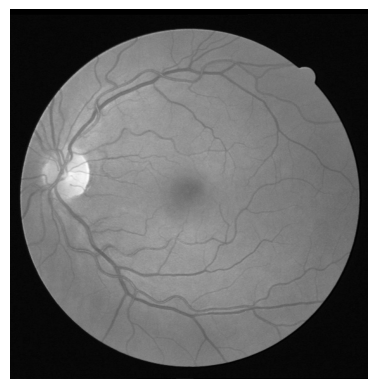

In [274]:
# Define image path
image_path = "DRIVE/image/01.tif"
mask_path = "DRIVE/mask/01.png"
# Read the image with unchanged format (might be RGB or BGR depending on source)
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)


def tiff_to_grayscale(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale using the luminosity method
    gray = 0.299 * image_rgb[:, :, 0] + 0.587 * image_rgb[:, :, 1] + 0.114 * image_rgb[:, :, 2]
    return gray.astype(np.uint8)

gray = tiff_to_grayscale(image)
# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

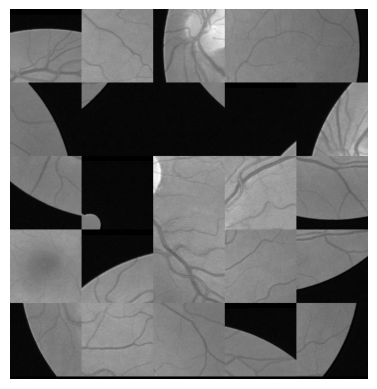

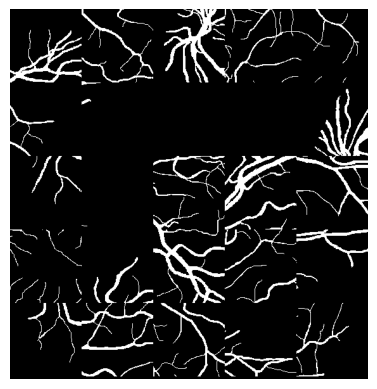

In [275]:
def shuffle_image_blocks(img, mask, num_blocks=5, seed=None):
    if seed is not None:
        np.random.seed(seed)

    height, width = img.shape
    block_height = height // num_blocks
    block_width = width // num_blocks

    # Step 1: Extract blocks and their original positions
    img_blocks = []
    mask_blocks = []
    original_positions = []

    for i in range(num_blocks):
        for j in range(num_blocks):
            img_block = img[i*block_height:(i+1)*block_height,
                            j*block_width:(j+1)*block_width]
            mask_block = mask[i*block_height:(i+1)*block_height,
                              j*block_width:(j+1)*block_width]

            img_blocks.append(img_block)
            mask_blocks.append(mask_block)
            original_positions.append((i, j))

    # Step 2: Shuffle positions (same for both image and mask)
    shuffled_positions = original_positions.copy()
    np.random.shuffle(shuffled_positions)

    # Step 3: Reconstruct both image and mask
    reconstructed_img = np.zeros_like(img)
    reconstructed_mask = np.zeros_like(mask)

    for img_block, mask_block, (i_new, j_new) in zip(img_blocks, mask_blocks, shuffled_positions):
        reconstructed_img[i_new*block_height:(i_new+1)*block_height,
                          j_new*block_width:(j_new+1)*block_width] = img_block

        reconstructed_mask[i_new*block_height:(i_new+1)*block_height,
                           j_new*block_width:(j_new+1)*block_width] = mask_block

    return reconstructed_img, reconstructed_mask

# Read the mask image
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

shuffled_image, shuffled_mask = shuffle_image_blocks(gray, mask, num_blocks=5, seed=42)
# Display the shuffled grayscale image
plt.imshow(shuffled_image, cmap='gray')
plt.axis('off')
plt.show()
# Display the shuffled mask
plt.imshow(shuffled_mask, cmap='gray')
plt.axis('off')
plt.show()



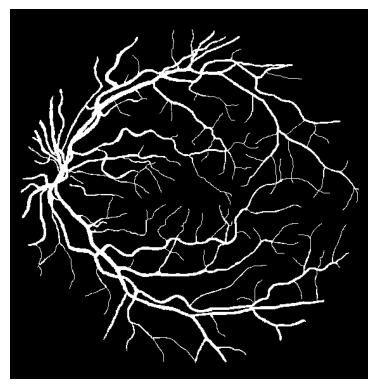

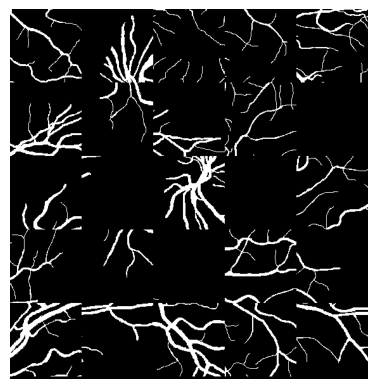